# Segmentação automática

Inicialmente, importação das bibliotecas e leitura da tabela.

In [1]:
import pandas as pd
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mov1_data.csv')
df.head()

,pitches,onsets,durations,notes,staff_id,string,st3_dist_atk,st3_rests
0,[90],0,4432,['f#6'],center,[4],0,0
1,[66],616,307,['f#4'],down,[5],0,625
2,[66],1548,304,['f#4'],down,[5],932,4966
3,[74],4432,3940,['d5'],center,[4],0,0
4,[66],6818,142,['f#4'],down,[5],5270,0


A segmentação automática seguiu um palpite do analista sobre a possibilidade de articular a peça em seções baseado nas distâncias entre onsets da pauta inferior. No caso, caso a distância entre um evento e outro utrapassasse um valor liminar, isso seria motivo de articulação, ou seja, teríamos um ponto de segmentação. <br>
Para estudar qual seria o melhor valor liminar para a segmentação, é importante uma análise do gráfico de distâncias entre onsets, derivado da coluna st3_dist_atk.

<AxesSubplot:>

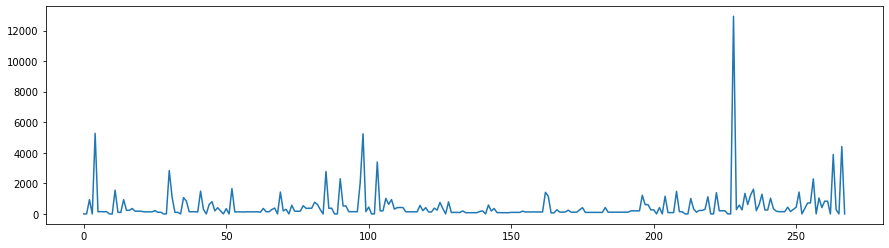

In [3]:
plt.figure(figsize=(15,4))
df.st3_dist_atk.plot()

A partir do gráfico, pode-se inferir que um valor inferior a 2000 (ms) irá segmentar a peça em um número maior de partes. Para testar diferentes possibilidades, criou-se a função abaixo.

In [4]:
def segment_mov1(df, dist_atk):
    '''
    Segment a dataframe by defining a minimum distance between attacks 
    and presence of rest between segments.
    df should be formated with columns = ['pitches', 'onsets', 'durations', 
    'notes', 'dist_atk', 'staff_id', 'string', 'st3_dist_atk', 'st3_rests']
    A função retorna listas de indexes de df correspondentes aos segmentos calculados.
    '''
    filt = (df['staff_id'] == 'down')
    idx = df[filt].index.array  # todas as notas da pauta inferior

    filt1 = (df['st3_dist_atk'] >= dist_atk)
    idx1 = df.loc[filt1, 'st3_dist_atk'].index.array # notas da pauta inferior com dist_atk > 1000
    filt2 = (df['st3_rests'] > 20) # 20ms é um limiar mínimo superior a erros de quantização das durações
    idx2 = df.loc[filt2, 'st3_rests'].index.array # notas da pauta inferior com rest > 20

    segm_idx = [idx[0]]
    for i, v in enumerate(idx):
        if (v in idx1) and (idx[i-1] in idx2):
            segm_idx.append(v)
    # segm_idx  ==> index das notas da pauta inferior que
    # iniciam os segmentos e cumprem as duas regras acima. 

    ## gerar uma lista de segmentos da pauta inferior (indexes in df)
    segm = []
    for i in range(1, len(segm_idx)):
        beg = segm_idx[i-1]
        end = segm_idx[i]
        temp = []
        for j in idx:
            if (j >= beg) and (j < end) and (j in idx):
                temp.append(j)
        segm.append(temp)

    last_seg_beg = segm_idx[-1]
    last_seg_end = idx[-1]
    last_segm = []
    for j in idx:
        if (j >= last_seg_beg) and (j <= last_seg_end) and (j in idx):
            last_segm.append(j)
    segm.append(last_segm)

    return segm

In [5]:
segment_mov1(df, 1000)

[[1, 2],
 [4, 5, 6, 7, 8],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [30],
 [31, 32, 33],
 [35, 36, 37, 38, 39, 40],
 [41, 42, 44, 45, 46, 47, 48, 50],
 [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
 [69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
 [85, 86, 87],
 [90, 91, 92, 93, 94, 95, 96],
 [97],
 [98, 99, 100],
 [103, 104, 105],
 [106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161],
 [162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  

Só para comparação, caso o valor de corte fosse maior, teríamos menos segmentos, com mais eventos cada.

In [6]:
print(segment_mov1(df, 5000))

[[1, 2], [4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 90, 91, 92, 93, 94, 95, 96, 97], [98, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 225], [228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

## visualização
Para visualização da segmentação na partitura, foi necessário utilizar a bilbioteca opencv-python. Além disso, foi também necessário toda uma lista de posições dos eventos nas páginas da partitura.

In [7]:
import cv2

In [9]:
## CONSTANTS
screen_width = 1280

left = 50
right = 1225

p1_sys1_v = (200, 300)
p1_sys2_v = (500, 600)
p1_sys3_v = (800, 880)
p2_sys1_v = (170, 270)
p2_sys2_v = (480,590)
p2_sys3_v = (780,880)
p3_sys1_v = (160,260)

p1_sys1_n = (1,2,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30)
p1_sys2_n = (31,32,33,35,36,37,38,39,40,41,42,44,45,46,47,48,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,69,70,71,73,74,75,76)
p1_sys3_n = (77,78,79,80,81,82,83,85,86,87,90,91,92,93,94,95,96,97,98,99,100,103,104,105)
p2_sys1_n = (106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162)
p2_sys2_n = (163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,202,204,205,206,207,208,209,210,213,214)
p2_sys3_n = (215,216,217,218,219,222,223,224,225,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242)
p3_sys1_n = (243,244,245,246,247,248,249,250,251,253,254,255,256,258,259,260,261,263,264,266)

x_pos_dict = {}
x_p1_1 = (147,210,424,443,464,484,506,643,660,676,719,743,767,831,855,875,895,914,933,949,969,1007,1022,1040,1147)
x_p1_2 = (117,134,147,206,233,250,264,281,298,384,405,492,522,543,579,598,637,713,726,741,757,773,789,805,821,837,881,896,925,940,956,976,1010,1061,1079,1096,1138,1154,1171,1186)
x_p1_3 = (114,135,154,179,225,249,283,366,391,412,550,591,628,646,660,678,689,790,922,940,979,1143,1164,1180)
x_p2_1 = (136,172,195,215,231,253,284,297,312,325,339,354,382,397,427,443,458,483,496,518,545,630,647,659,671,687,711,727,738,755,767,780,802,817,861,877,903,917,932,947,964,972,990,1000,1015,1025,1046,1061,1075,1091,1106,1121,1133,1145,1191)
x_p2_2 = (114,132,148,175,189,204,219,245,261,278,291,310,345,359,376,389,403,419,433,448,492,510,525,539,554,566,583,594,610,627,646,660,682,727,765,818,838,855,922,977,990,1003,1020,1103,1121,1136,1185,1209)
x_p2_3 = (106,129,151,174,246,330,351,371,388,650,675,702,724,780,810,912,950,970,1015,1091,1114,1135,1164,1207)
x_p3_1 = (116,130,145,160,198,210,243,277,327,358,404,449,586,652,677,706,769,858,880,1057)

for i,j in zip(p1_sys1_n, x_p1_1):
    x_pos_dict[i] = j

for i,j in zip(p1_sys2_n, x_p1_2):
    x_pos_dict[i] = j

for i,j in zip(p1_sys3_n, x_p1_3):
    x_pos_dict[i] = j

for i,j in zip(p2_sys1_n, x_p2_1):
    x_pos_dict[i] = j

for i,j in zip(p2_sys2_n, x_p2_2):
    x_pos_dict[i] = j

for i,j in zip(p2_sys3_n, x_p2_3):
    x_pos_dict[i] = j

for i,j in zip(p3_sys1_n, x_p3_1):
    x_pos_dict[i] = j

In [10]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    return cv2.resize(image, dim, interpolation=inter)

In [11]:
def draw_segments(segment_lst, color=(0,0,150), margin=7):
    '''
    Draw a rectangle over the segments defined by numbered sounds.
    '''
    global screen_width, left, right, p1_sys1_v, p1_sys2_v, p1_sys3_v, p2_sys1_v, p2_sys2_v, p2_sys3_v, p3_sys1_v, x_pos_dict
    
    path1 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p1.png'
    path2 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p2.png'
    path3 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p3.png'
    image1 = cv2.imread(path1)
    img1 = ResizeWithAspectRatio(image1, width=screen_width)
    image2 = cv2.imread(path2)
    img2 = ResizeWithAspectRatio(image2, width=screen_width)
    image3 = cv2.imread(path3)
    img3 = ResizeWithAspectRatio(image3, width=screen_width)

    fscale = 0.4
    font = cv2.FONT_HERSHEY_SIMPLEX 
    lineType = cv2.LINE_AA
    v_margin = 12

    for i, seg in enumerate(segment_lst):
        begin = seg[0]
        end = seg[-1]
        ## p1
        if end < 106:
            if end <= 30:
                v = p1_sys1_v
                cv2.rectangle(img1, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin >= 31 and end <= 76 :
                v = p1_sys2_v
                cv2.rectangle(img1, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,9), thickness=1, lineType=lineType)
            elif begin >= 77 and end <= 105:
                v = p1_sys3_v
                cv2.rectangle(img1, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin <= 30 and end > 30 and end <= 76:
                v1 = p1_sys1_v
                v2 = p1_sys2_v
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-5, v1[1]), color, 2)
                cv2.line(img1, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
                cv2.line(img1, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.line(img1, (x_pos_dict[end]+5, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin > 30 and begin <= 76 and end > 76:
                v1 = p1_sys2_v
                v2 = p1_sys3_v
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
                cv2.line(img1, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
                cv2.line(img1, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.line(img1, (x_pos_dict[end]+margin, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin <= 30 and end > 30 and end <= 76:
                v1 = p1_sys1_v
                v2 = p1_sys2_v
                v3 = p1_sys3_v
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
                cv2.line(img1, (left, v2[0]), (right, v2[0]), color, 2)
                cv2.line(img1, (left, v2[1]), (right, v2[1]), color, 2)
                cv2.line(img1, (left, v3[0]), (x_pos_dict[end]+margin, v3[0]), color, 2)
                cv2.line(img1, (left, v3[1]), (x_pos_dict[end]+margin, v3[1]), color, 2)
                cv2.line(img1, (x_pos_dict[end]+margin, v3[0]), (x_pos_dict[end]+margin, v3[1]), color, 2)
                cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)

        ## p2    
        elif begin >= 106 and end < 243:
            if end <= 162:
                v = p2_sys1_v
                cv2.rectangle(img2, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                if i in [28,31,38]:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*3), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
                else:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin >= 163 and end <= 214 :
                v = p2_sys2_v
                cv2.rectangle(img2, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin >= 215 and end <= 242:
                v = p2_sys3_v
                cv2.rectangle(img2, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin <= 162 and end > 162 and end <= 214:
                v1 = p2_sys1_v
                v2 = p2_sys2_v
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
                cv2.line(img2, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
                cv2.line(img2, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.line(img2, (x_pos_dict[end]+margin, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                if i in [28,31,38]:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*3), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
                else:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin > 162 and begin <= 214 and end > 214:
                v1 = p2_sys2_v
                v2 = p2_sys3_v
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
                cv2.line(img2, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
                cv2.line(img2, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.line(img2, (x_pos_dict[end]+margin, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            elif begin <= 162 and end > 214:
                v1 = p2_sys1_v
                v2 = p2_sys2_v
                v3 = p2_sys3_v
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
                cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
                cv2.line(img2, (left, v2[0]), (right, v2[0]), color, 2)
                cv2.line(img2, (left, v2[1]), (right, v2[1]), color, 2)
                cv2.line(img2, (left, v3[0]), (x_pos_dict[end]+margin, v3[0]), color, 2)
                cv2.line(img2, (left, v3[1]), (x_pos_dict[end]+margin, v3[1]), color, 2)
                cv2.line(img2, (x_pos_dict[end]+margin, v3[0]), (x_pos_dict[end]+margin, v3[1]), color, 2)
                cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
                if i in [28,31,38]:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*3), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
                else:
                    cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)

        ## p3
        elif begin >= 243:
            v = p3_sys1_v
            cv2.rectangle(img3, (x_pos_dict[begin]-margin, v[0]), (x_pos_dict[end]+margin, v[1]), color, 2)
            cv2.putText(img3, str(begin), (x_pos_dict[begin]-margin, v[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
            if i in [58]:
                cv2.putText(img3, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*3), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)
            else:
                cv2.putText(img3, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)

        ## p1_2
        # p1sys3 a p2sys1
        elif begin >= 77 and begin <= 105 and end >= 106 and end <= 162:
            v1 = p1_sys3_v
            v2 = p1_sys2_v
            cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
            cv2.line(img1, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
            cv2.line(img1, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
            cv2.line(img2, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
            cv2.line(img2, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
            cv2.line(img2, (x_pos_dict[end]+margin, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
            cv2.putText(img1, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
            cv2.putText(img1, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)

        ## p2_3
        # p2sys3 a p3sys1
        elif begin >= 215 and begin <= 242 and end >= 243 and end <= 266:
            v1 = p2_sys3_v
            v2 = p3_sys1_v
            cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (right, v1[0]), color, 2)
            cv2.line(img2, (x_pos_dict[begin]-margin, v1[1]), (right, v1[1]), color, 2)
            cv2.line(img2, (x_pos_dict[begin]-margin, v1[0]), (x_pos_dict[begin]-margin, v1[1]), color, 2)
            cv2.line(img3, (left, v2[0]), (x_pos_dict[end]+margin, v2[0]), color, 2)
            cv2.line(img3, (left, v2[1]), (x_pos_dict[end]+margin, v2[1]), color, 2)
            cv2.line(img3, (x_pos_dict[end]+margin, v2[0]), (x_pos_dict[end]+margin, v2[1]), color, 2)
            cv2.putText(img2, str(begin), (x_pos_dict[begin]-margin, v1[1]+v_margin), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=lineType)
            cv2.putText(img2, 'segm_'+str(i), (x_pos_dict[begin]-margin, v[1]+v_margin*2), fontFace=font, fontScale=fscale, color=(100,0,0), thickness=1, lineType=lineType)

    ## save images
    cv2.imwrite('temp1.png', img1)   
    cv2.imwrite('temp2.png', img2) 
    cv2.imwrite('temp3.png', img3)  

    print('images generated: temp1.png, temp2.png and temp3.png')


Teste:

In [12]:
segment_lst = segment_mov1(df, 1000)
draw_segments(segment_lst, color=(0,0,150), margin=11)

images generated: temp1.png, temp2.png and temp3.png


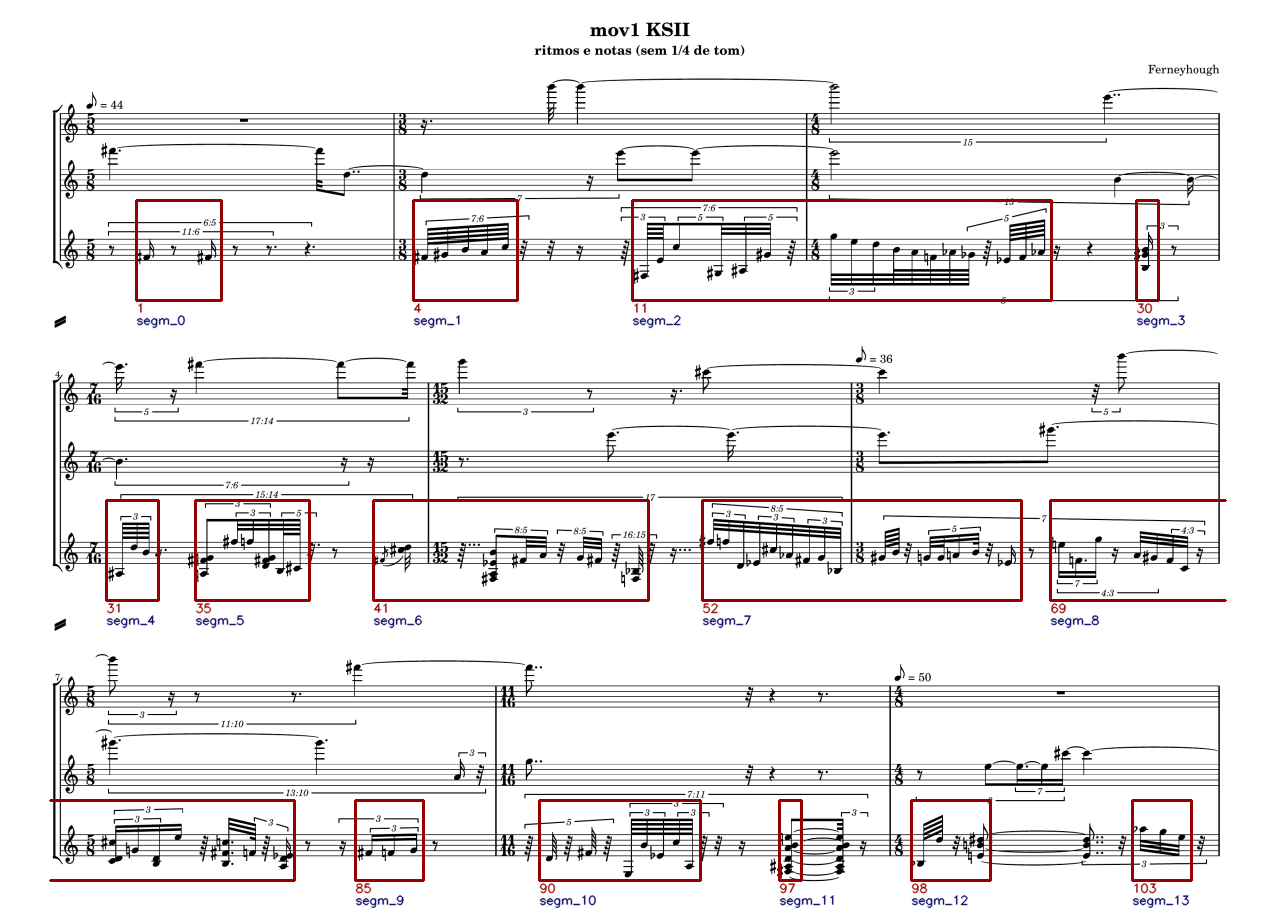

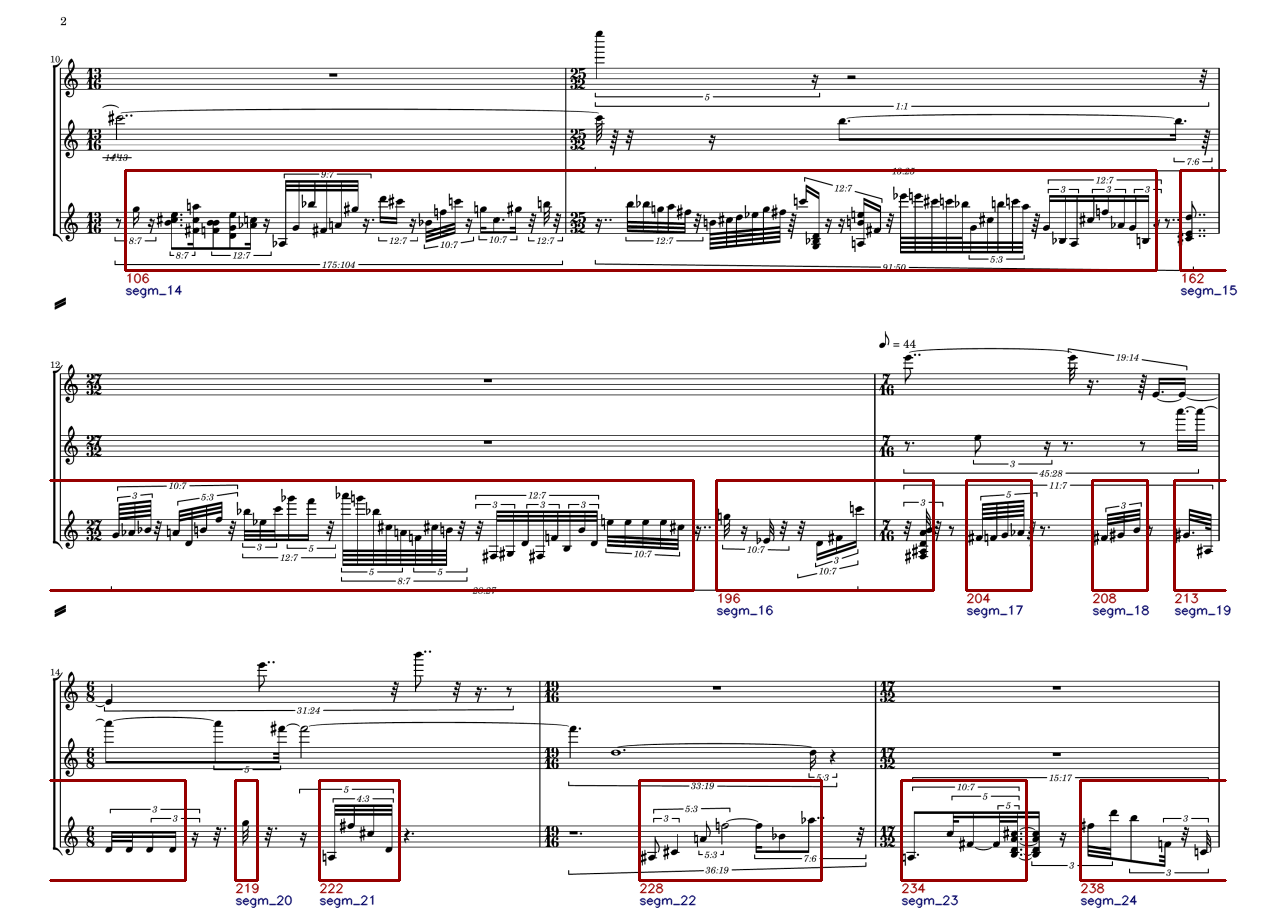

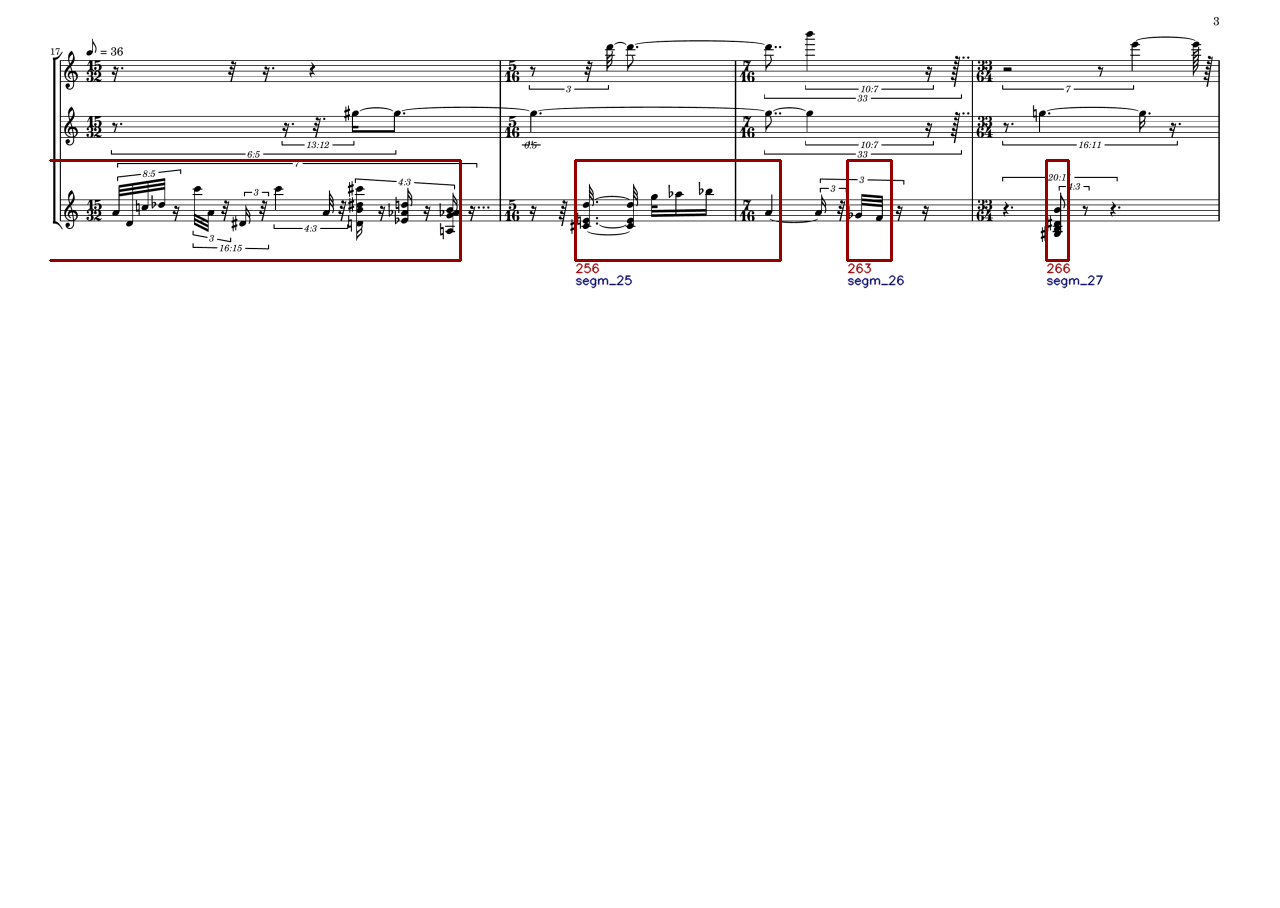

Com a visualização dos segmentos na partitura, fica claro que ainda há segmentos extensos, por exemplo, na p.2 o segmento 14 - constituído pelos eventos 106 a 161. Torna-se, então, necessário um segundo critério de segmentação, posterior ao primeiro. Observando a partitura com atenção surge a ideia de segmentar internamente cada um dos segmentos gerados anteriormente baseado na existência de pausas entre os eventos. Entretanto surgem alguns problemas relacionados ao processo de quantização das durações durante a conversão para midi. Há algumas pausas na coluna st3_rests com valor muito pequeno, muito menor do que as figuras musicais das pausas da partitura.

In [13]:
pausas = df['st3_rests'].tolist()
print(set(pausas))

{0, 128, 258, 1412, 5, 6, 7, 8, 9, 10, 11, 139, 260, 395, 1287, 138, 1937, 1938, 148, 4, 405, 407, 150, 149, 1051, 157, 4132, 421, 2727, 167, 295, 300, 2223, 304, 817, 688, 824, 184, 317, 191, 320, 12736, 966, 200, 207, 208, 83, 212, 87, 1372, 733, 1505, 866, 100, 357, 4966, 107, 1900, 365, 1392, 625, 114, 243, 886, 1014, 1020, 125, 511}


Assim, consideramos pausas apenas os valores superiores a 20ms. Segue-se a nova função para o segundo passo da segmentação automática. <br>
Há ainda um outro fator que consideramos relevante. Trata-se de algumas segmentações que isolam eventos de um único ataque. Por exemplo, os dois F#4 do cp1, ou ainda, os acordes staccato do cp17. Nesses casos, seria melhor juntarmos esses eventos em um único segmento. Assim a função abaixo analisa quando isso ocorre e se encarrega de corrigir o resultado da segmentação.

In [14]:
def subsegment_mov1(df, segment):
    '''
    The argument "segment" is a list of indexes of df (generated by function "segment_mov1").
    This function segments again a segment from a dataframe by defining a presence of rest between subsegments.
    df should be formated with columns = ['pitches', 'onsets', 'durations', 
    'notes', 'dist_atk', 'staff_id', 'string', 'st3_dist_atk', 'st3_rests']
    A função retorna listas de indexes de df correspondentes aos subsegmentos calculados.
    No caso de haver subsegmentos seguidos com apenas 1 ataque, eles são agrupados.
    '''
    r = df.loc[segment, 'st3_rests'].array
    temp = []
    for i, v in enumerate(r):
        if v > 20:
            temp.append(i)
    
    # ==> index das notas iniciais de segmentos internos
    subseg = [segment[0]]
    for i in temp[:-1]:
        if segment[i+1] in segment:
            subseg.append(segment[i+1])
    # subseg

    ## gerar uma lista de subsegmentos do seg_106 (index in df)
    subsegm_idx = []
    for i in range(1, len(subseg)):
        beg = subseg[i-1]
        end = subseg[i]
        temp = []
        for j in segment:
            if (j >= beg) and (j < end) and (j in segment):
                temp.append(j)
        subsegm_idx.append(temp)

    last_subseg_beg = subseg[-1]
    last_subseg_end = segment[-1]
    last_subsegm = []
    for j in segment:
        if (j >= last_subseg_beg) and (j <= last_subseg_end) and (j in segment):
            last_subsegm.append(j)
    subsegm_idx.append(last_subsegm)
    # print('subsegm_idx: ', subsegm_idx)

    ## Agrupar subsegmentos seguidos caso tenham apenas um ataque
    size = [len(i) for i in subsegm_idx]
    grp1 = [list(y) for x, y in groupby(size, lambda x: x == 1)]
    next_pass = False
    for i in grp1:
        if (len(i) > 1) and (i[0] == 1):
            next_pass = True
            break
    # print('bool: ', next_pass)
    if next_pass:
        grp2 = []
        cnt = 0
        for i, v in enumerate(grp1):
            if (len(v) > 1) and (v[0] == 1):
                pos = list(range(cnt,len(v)+cnt))
                grp_temp = [j for j in pos]
                grp2.append(grp_temp)
            else:
                pos = list(range(cnt,len(v)+cnt))
                grp_temp = [j for j in pos]
                for k in grp_temp:
                    grp2.append([k])
            cnt += len(v)
        # print(grp2)
        grp3 = []
        for i in grp2:
            if len(i) > 1:
                temp = []
                for j in i:
                    temp.extend(subsegm_idx[j])  
                grp3.append(temp)
            else:
                grp3.append(subsegm_idx[i[0]])
        # print('grp3: ', grp3)
        return grp3
    else:
        return subsegm_idx


In [15]:
## teste:
segment14 = [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
subsegment_mov1(df, segment14)

[[106],
 [107, 108, 109, 110, 111],
 [112, 113, 114, 115, 116, 117],
 [118, 119],
 [120, 121, 122],
 [123, 124, 125],
 [126],
 [128, 129, 130, 131, 132],
 [133, 134, 135, 136, 137, 138],
 [139, 140],
 [142, 143],
 [144, 145, 146, 147, 148, 149, 150, 151, 152, 153],
 [154, 155, 156, 157, 158, 159, 160, 161]]

Agora um teste final para toda a partitura.

In [16]:
segmentation_level1 = segment_mov1(df, 1000)
segmentation_level2 = [subsegment_mov1(df,i) for i in segmentation_level1]

segments = []
for i in segmentation_level2:
    for j in i:
        segments.append(j)
segments

[[1, 2],
 [4, 5, 6, 7, 8],
 [11, 12, 13, 14, 15, 16],
 [17, 18, 19, 20, 21, 22, 23, 24],
 [25, 26, 27],
 [30],
 [31, 32, 33],
 [35, 36, 37, 38, 39, 40],
 [41, 42],
 [44, 45, 46],
 [47, 48],
 [50],
 [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62],
 [63, 64, 65, 66],
 [67],
 [69, 70, 71],
 [73, 74, 75, 76],
 [77, 78, 79, 80],
 [81, 82],
 [83],
 [85, 86, 87],
 [90, 91],
 [92, 93, 94, 95, 96],
 [97],
 [98, 99],
 [100],
 [103, 104, 105],
 [106],
 [107, 108, 109, 110, 111],
 [112, 113, 114, 115, 116, 117],
 [118, 119],
 [120, 121, 122],
 [123, 124, 125],
 [126],
 [128, 129, 130, 131, 132],
 [133, 134, 135, 136, 137, 138],
 [139, 140],
 [142, 143],
 [144, 145, 146, 147, 148, 149, 150, 151, 152, 153],
 [154, 155, 156, 157, 158, 159, 160, 161],
 [162, 163, 164, 165],
 [166, 167, 168, 169],
 [170, 171, 172, 173, 174],
 [175, 176, 177, 178, 179, 180, 181, 182],
 [183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195],
 [196, 197],
 [198, 199, 200],
 [202],
 [204, 205, 206, 207],
 [208, 209

Salvar a segmentação em um tabela.

In [17]:
segm = pd.Series(segments)
segm.to_csv('mov1_segments.csv')

Gerar a partitura com a segmentação automática.

In [18]:
draw_segments(segments, color=(0,0,150), margin=11)

images generated: temp1.png, temp2.png and temp3.png


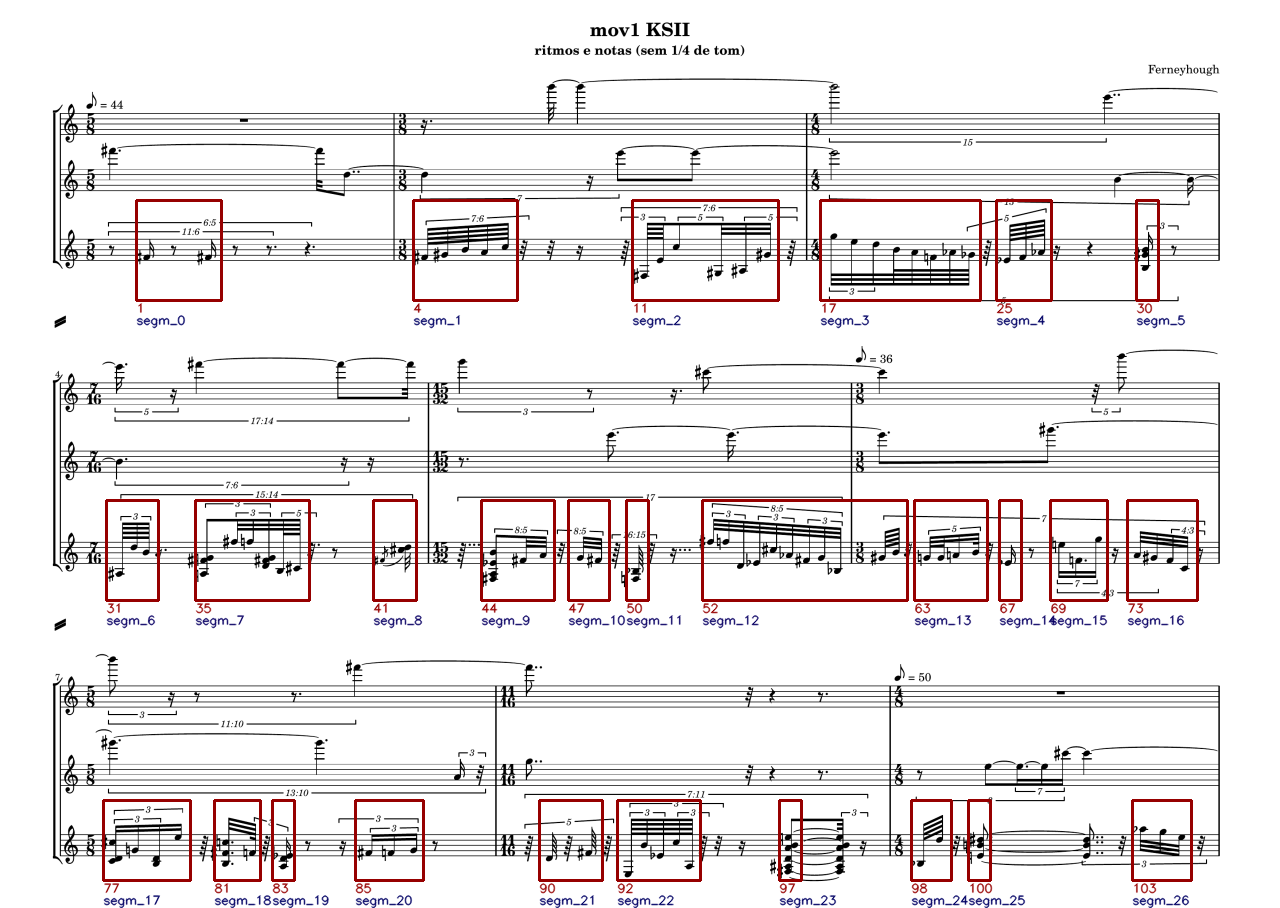

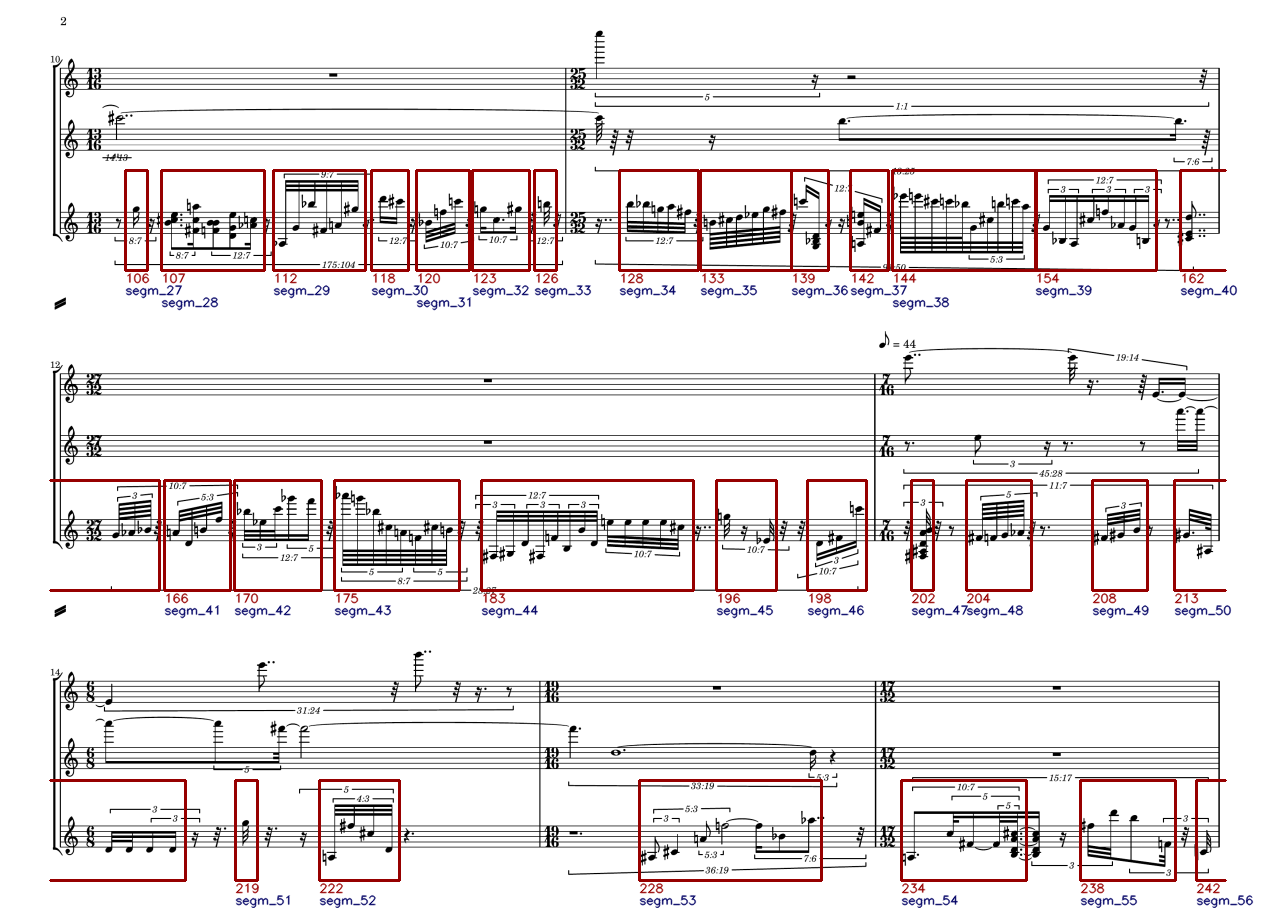

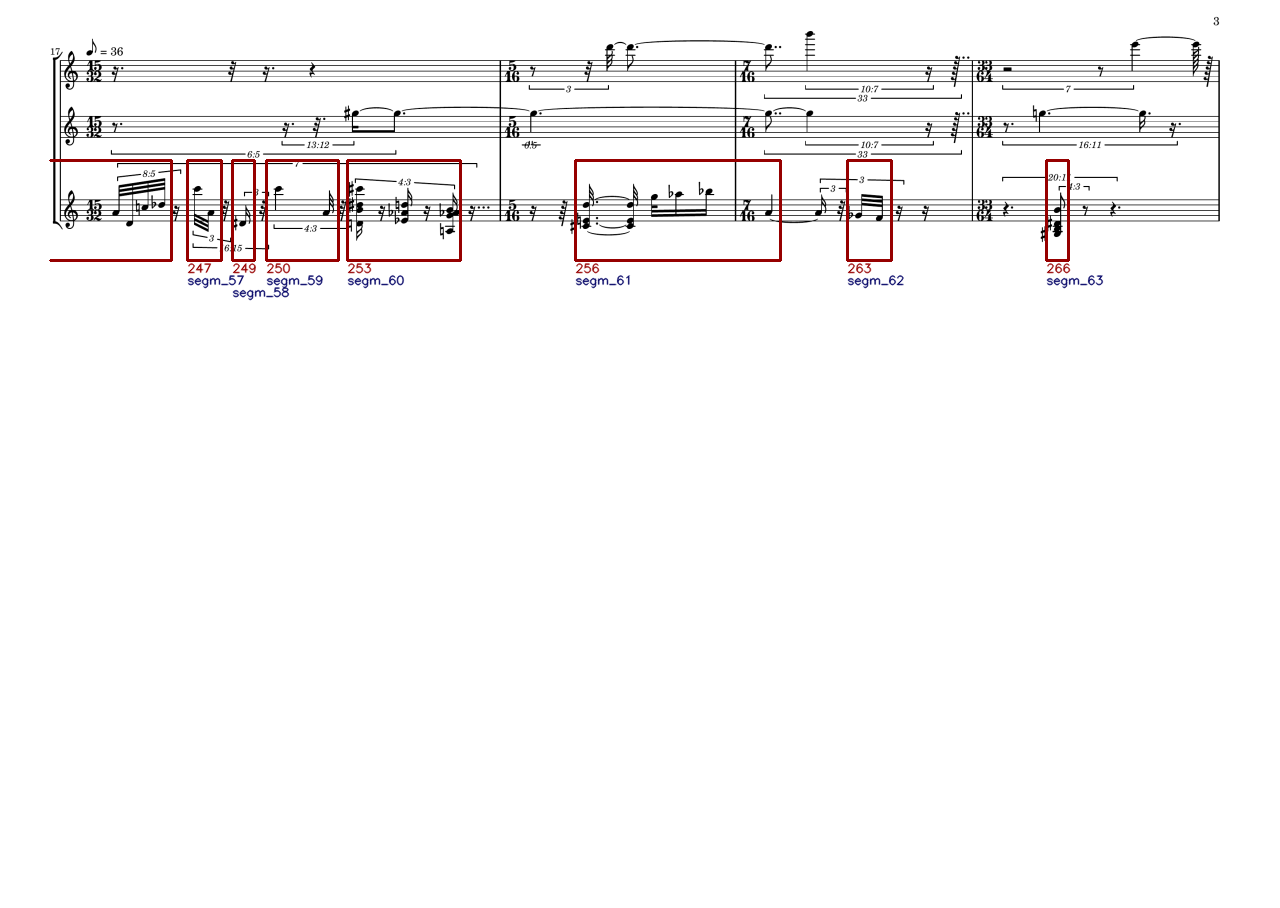

Seguem algumas funções adicionais para salvar os segmentos em imagens independentes e visualizar uma lista qualquer de segmentos. Isso será útil na comparação de similaridades e constrastes entre os mesmos.

In [19]:
def extract_segments(segment_lst, margin=11):
    '''
   Save a image with the defined segment.
    '''
    global screen_width, left, right, p1_sys1_v, p1_sys2_v, p1_sys3_v, p2_sys1_v, p2_sys2_v, p2_sys3_v, p3_sys1_v, x_pos_dict
    
    path1 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p1.png'
    path2 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p2.png'
    path3 = r'C:\Users\roger\OneDrive\Documentos\MuseScore3\Partitura\mov1_p3.png'
    image1 = cv2.imread(path1)
    img1 = ResizeWithAspectRatio(image1, width=screen_width)
    image2 = cv2.imread(path2)
    img2 = ResizeWithAspectRatio(image2, width=screen_width)
    image3 = cv2.imread(path3)
    img3 = ResizeWithAspectRatio(image3, width=screen_width)

    for i, seg in enumerate(segment_lst):
        begin = seg[0]
        end = seg[-1]
        ## p1
        if end < 106:
            if end <= 30:
                v = p1_sys1_v
                img_seg = img1[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)   
            elif begin >= 31 and end <= 76 :
                v = p1_sys2_v
                img_seg = img1[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)   
            elif begin >= 77 and end <= 105:
                v = p1_sys3_v
                img_seg = img1[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)   
            elif begin <= 30 and end > 30 and end <= 76:
                v1 = p1_sys1_v
                v2 = p1_sys2_v
                img_seg_a = img1[v1[0]:v1[1], x_pos_dict[begin]-margin:right]
                img_seg_b = img1[v2[0]:v2[1], left+50:x_pos_dict[end]+margin]
                img_seg = np.concatenate((img_seg_a,img_seg_b), axis=1)
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)   
    
        ## p2    
        elif begin >= 106 and end < 243:
            if end <= 162:
                v = p2_sys1_v
                img_seg = img2[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg) 
            elif begin >= 163 and end <= 214 :
                v = p2_sys2_v
                img_seg = img2[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)
            elif begin >= 215 and end <= 242:
                v = p2_sys3_v
                img_seg = img2[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)
            elif begin <= 162 and end > 162 and end <= 214:
                v1 = p2_sys1_v
                v2 = p2_sys2_v
                img_seg_a = img2[v1[0]:v1[1], x_pos_dict[begin]-margin:right]
                img_seg_b = img2[v2[0]:(v2[1]-10), left+50:x_pos_dict[end]+margin]
                img_seg = np.concatenate((img_seg_a,img_seg_b), axis=1)
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)  
            elif begin > 162 and begin <= 214 and end > 214:
                v1 = p2_sys2_v
                v2 = p2_sys3_v
                img_seg_a = img2[v1[0]:v1[1]-10, x_pos_dict[begin]-margin:right]
                img_seg_b = img2[v2[0]:v2[1], left+50:x_pos_dict[end]+margin]
                img_seg = np.concatenate((img_seg_a,img_seg_b), axis=1)
                path = 'segm' + str(i) + '.png'
                cv2.imwrite(path, img_seg)
            
        ## p3
        elif begin >= 243:
            v = p3_sys1_v
            img_seg = img3[v[0]:v[1], x_pos_dict[begin]-margin:x_pos_dict[end]+margin]
            path = 'segm' + str(i) + '.png'
            cv2.imwrite(path, img_seg)

        ## p2_3
        # p2sys3 a p3sys1
        elif begin >= 215 and begin <= 242 and end >= 243 and end <= 266:
            v1 = p2_sys3_v
            v2 = p3_sys1_v
            img_seg_a = img2[v1[0]:v1[1], x_pos_dict[begin]-margin:right]
            img_seg_b = img3[v2[0]:v2[1], left+50:x_pos_dict[end]+margin]
            img_seg = np.concatenate((img_seg_a,img_seg_b), axis=1)
            path = 'segm' + str(i) + '.png'  
            cv2.imwrite(path, img_seg)

    print('images of the selected segments generated')

In [20]:

def show_segments(segments_lst, x_offset=200, segm_height=120, filename='segment_lst.png'):
    '''
	Plot number and segment score horizontally aligned. 
	Use vertical order to the sequence of segments.
    segments_lst => names of segments (ex: segm0, etc)
    '''
    names = ['segm' + str(i) + '.png' for i in segments_lst]
    images = [cv2.imread(i) for i in names]
    height_lst = [i.shape[0] for i in images]
    width_lst = [i.shape[1] for i in images]

    bg_height = len(segments_lst) * segm_height
    bg_width = x_offset + max(width_lst)
    bg = np.zeros((bg_height,bg_width,3)) + 150

    fscale = 0.6
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (0,0,30)

    for i, img in enumerate(images):
        y1 = i * segm_height
        y2 = y1 + height_lst[i]
        x1 = x_offset
        x2 = x1 + width_lst[i]
        bg[y1:y2, x1:x2] = img

        name = 'segmento ' + str(segments_lst[i]) 
        cv2.putText(bg, name, (50,y2-50), fontFace=font, fontScale=fscale, color=color, thickness=1, lineType=cv2.LINE_AA)
 
    cv2.imwrite(filename, bg)

In [21]:
# teste:
extract_segments(segments)

images of the selected segments generated


In [22]:
show_segments([12,3,39,38,43,44])
# essa função salva o arquivo 'segment_lst.png' no diretório do notebook.

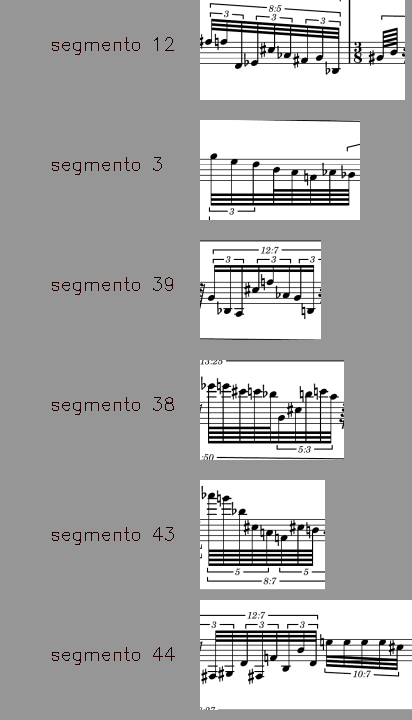

## Tabela dos segmentos
A tabela *mov1_segments.csv* precisa ser completada com dados relativos aos segmentos, como duração, alturas presentes, perfil melódico, etc. Esses dados serão utilizados na próxima etapa da pesquisa, que envolve a avaliação de similaridade/distância entre segmentos.

In [23]:
## a duração de cada segmento é definida pela distância entre o onset da última nota e o da primeira do segmento, 
# acrescido da duração da última nota
def get_global_dur(segment):
    '''
    segment duration
    '''
    global df
    last_onset = df.loc[segment[-1], 'onsets']
    first_onset = df.loc[segment[0], 'onsets']
    last_dur = df.loc[segment[-1], 'durations']
    return last_onset - first_onset + last_dur


seg_dur = [get_global_dur(i) for i in segments]
print(seg_dur)

[1236, 724, 1827, 1193, 327, 361, 304, 1520, 605, 1199, 397, 151, 1434, 712, 468, 701, 711, 1667, 764, 555, 1100, 782, 722, 4357, 300, 3200, 600, 308, 2288, 825, 417, 368, 1242, 100, 475, 492, 380, 375, 908, 1018, 1350, 487, 875, 805, 1905, 805, 805, 142, 341, 435, 1492, 341, 815, 4162, 3219, 1719, 769, 302, 295, 1604, 1785, 6823, 555, 684]


In [24]:
## número de ataques por segmento
n_atks = [len(i) for i in segments]
print(n_atks)

[2, 5, 6, 8, 3, 1, 3, 6, 2, 3, 2, 1, 11, 4, 1, 3, 4, 4, 2, 1, 3, 2, 5, 1, 2, 1, 3, 1, 5, 6, 2, 3, 3, 1, 5, 6, 2, 2, 10, 8, 4, 4, 5, 8, 13, 2, 3, 1, 4, 3, 6, 1, 4, 6, 4, 4, 5, 2, 1, 2, 3, 5, 2, 1]


In [25]:
## lista de distância entre ataques no segmento
## omitir a distância da primeira nota com o segmento anterior
## (segmentos com um único ataque tem lista vazia pois não há distâncias internas)
dist = []
for i in segments:
    d = df.loc[i, 'st3_dist_atk'].tolist()
    dist.append(d[1:])
dist

[[932],
 [142, 151, 139, 150],
 [103, 96, 932, 233, 236],
 [179, 182, 179, 142, 133, 137, 136],
 [105, 114],
 [],
 [99, 106],
 [846, 143, 142, 142, 127],
 [293],
 [801, 199],
 [198],
 [],
 [134, 136, 134, 127, 137, 136, 134, 133, 137, 111],
 [146, 138, 289],
 [],
 [198, 302],
 [184, 173, 181],
 [365, 371, 375],
 [625],
 [],
 [364, 375],
 [521],
 [146, 149, 146, 142],
 [],
 [150],
 [],
 [200, 200],
 [],
 [938, 312, 413, 420],
 [138, 138, 137, 137, 138],
 [212],
 [126, 124],
 [249, 750],
 [],
 [92, 100, 95, 93],
 [80, 82, 88, 80, 82],
 [193],
 [188],
 [88, 82, 80, 83, 80, 100, 100, 100, 100],
 [125, 130, 125, 133, 125, 130, 125],
 [1158, 62, 68],
 [125, 117, 125],
 [113, 113, 112, 268],
 [100, 100, 100, 100, 105, 100, 100],
 [112, 113, 112, 113, 112, 113, 112, 113, 200, 200, 205, 200],
 [605],
 [268, 270],
 [],
 [86, 85, 85],
 [151, 142],
 [327, 114, 227, 228, 298],
 [],
 [205, 207, 205],
 [284, 577, 262, 1343, 617],
 [1619, 213, 611],
 [261, 256, 1029],
 [179, 146, 149, 149],
 [157],
 [

In [26]:
# string to list conversion in pitches column
import ast
df.pitches = df.pitches.apply(ast.literal_eval)

## lista de midinotes por segmento
mids = []
for i in segments:
    m = df.loc[i, 'pitches'].tolist()
    mids.append(m)
mids

[[[66], [66]],
 [[66], [68], [71], [69], [72]],
 [[54], [64], [72], [56], [58], [68]],
 [[79], [76], [74], [71], [69], [65], [68], [66]],
 [[63], [65], [68]],
 [[71, 68, 59]],
 [[58], [74], [71]],
 [[67, 66, 57], [78], [77], [67, 66, 62], [59], [61]],
 [[66], [74, 73]],
 [[71, 63, 57, 54], [66], [69]],
 [[67], [66]],
 [[58, 53]],
 [[78], [77], [62], [63], [73], [68], [66], [67], [58], [68], [71]],
 [[67], [67], [69], [71]],
 [[63]],
 [[76], [65], [79]],
 [[69], [68], [65], [60]],
 [[73, 62, 60], [67], [62, 59], [76]],
 [[72, 66, 59], [65]],
 [[63, 62, 57]],
 [[66], [65], [67]],
 [[62], [66]],
 [[52], [71], [63], [72], [57]],
 [[76, 71, 69, 62, 58, 54]],
 [[58], [74]],
 [[75, 71, 64]],
 [[80], [79], [76]],
 [[79]],
 [[76, 73, 71], [81, 73, 66], [71, 65], [76, 67, 62], [72, 68]],
 [[56], [67], [82], [66], [69], [80]],
 [[86], [85]],
 [[70], [77], [84]],
 [[79], [72], [80]],
 [[83]],
 [[83], [82], [79], [81], [78]],
 [[71], [73], [74], [75], [79], [78]],
 [[84], [62, 58, 55]],
 [[76, 71, 

In [27]:
## perfil melódico microtonal
## alterar mids segundo informações das cordas (afinação)
df.string = df.string.apply(ast.literal_eval)

seg_strings = []
for i in segments:
    c = df.loc[i, 'string'].tolist()
    seg_strings.append(c)

seg_strings

[[[5], [5]],
 [[5], [5], [2], [3], [3]],
 [[6], [4], [3], [6], [5], [3]],
 [[3], [3], [3], [4], [4], [4], [4], [4]],
 [[4], [4], [3]],
 [[2, 3, 5]],
 [[5], [2], [2]],
 [[3, 4, 5], [1], [1], [3, 4, 5], [5], [5]],
 [[5], [3, 4]],
 [[2, 4, 5, 6], [5], [5]],
 [[6], [5]],
 [[5, 6]],
 [[2], [2], [4], [4], [2], [3], [4], [4], [6], [4], [2]],
 [[6], [3], [3], [2]],
 [[6]],
 [[2], [4], [2]],
 [[3], [3], [4], [6]],
 [[3, 4, 6], [4], [4, 6], [3]],
 [[4, 5, 6], [5]],
 [[6, 4, 5]],
 [[5], [5], [4]],
 [[5], [5]],
 [[6], [2], [4], [2], [5]],
 [[1, 2, 3, 4, 5, 6]],
 [[5], [2]],
 [[3, 4, 5]],
 [[1], [1], [2]],
 [[3]],
 [[1, 3, 2], [1, 3, 4], [2, 3, 4], [2, 3, 4], [2, 3]],
 [[6], [3], [1], [4], [3], [1]],
 [[1], [1]],
 [[4], [3], [1]],
 [[2], [3], [2]],
 [[3]],
 [[2], [2], [3], [2], [3]],
 [[2], [3], [3], [3], [2], [2]],
 [[1], [4, 5, 6]],
 [[1, 2, 5], [5]],
 [[1], [1], [1], [1], [2], [3], [3], [1], [1], [1]],
 [[3], [5], [5], [2], [1], [3], [3], [5]],
 [[2, 4, 5], [3], [4], [4]],
 [[4], [5], [3], [2]],

In [28]:
## afinação
tuning = {1: -0.5, 2: -1, 3: 0, 4: 0, 5: 1.5, 6: 0.5}

mid_microtons = []
for i in zip(mids, seg_strings):
    m = i[0]
    s = i[1]
    temp = []
    for j in zip(m,s):
        m2 = j[0]
        s2 = j[1]
        temp1 = []
        for k in zip(m2,s2):
            m3 = k[0]   # midi
            s3 = k[1]   # string
            m3b = m3 + tuning[s3]
            temp1.append(m3b)
        temp.append(temp1)
    mid_microtons.append(temp)

mid_microtons

[[[67.5], [67.5]],
 [[67.5], [69.5], [70], [69], [72]],
 [[54.5], [64], [72], [56.5], [59.5], [68]],
 [[79], [76], [74], [71], [69], [65], [68], [66]],
 [[63], [65], [68]],
 [[70, 68, 60.5]],
 [[59.5], [73], [70]],
 [[67, 66, 58.5], [77.5], [76.5], [67, 66, 63.5], [60.5], [62.5]],
 [[67.5], [74, 73]],
 [[70, 63, 58.5, 54.5], [67.5], [70.5]],
 [[67.5], [67.5]],
 [[59.5, 53.5]],
 [[77], [76], [62], [63], [72], [68], [66], [67], [58.5], [68], [70]],
 [[67.5], [67], [69], [70]],
 [[63.5]],
 [[75], [65], [78]],
 [[69], [68], [65], [60.5]],
 [[73, 62, 60.5], [67], [62, 59.5], [76]],
 [[72, 67.5, 59.5], [66.5]],
 [[63.5, 62, 58.5]],
 [[67.5], [66.5], [67]],
 [[63.5], [67.5]],
 [[52.5], [70], [63], [71], [58.5]],
 [[75.5, 70, 69, 62, 59.5, 54.5]],
 [[59.5], [73]],
 [[75, 71, 65.5]],
 [[79.5], [78.5], [75]],
 [[79]],
 [[75.5, 73, 70], [80.5, 73, 66], [70, 65], [75, 67, 62], [71, 68]],
 [[56.5], [67], [81.5], [66], [69], [79.5]],
 [[85.5], [84.5]],
 [[70], [77], [83.5]],
 [[78], [72], [79]],
 [[

In [29]:
## linha melódica pegando a nota mais aguda de cada acorde e as notas isoladas
mid_melodic = []
for i in mid_microtons:
    temp = []
    for j in i:
        temp.append(max(j))
    mid_melodic.append(temp)

## perfil intervalar dos segmentos (derivado de mid_melodic)
melodic_profile = []
for i in mid_melodic:
    temp = []
    if len(i) > 1:
        for j in range(1,len(i)):
            interv = i[j] - i[j-1]
            temp.append(interv)
    melodic_profile.append(temp)

melodic_profile

[[0.0],
 [2.0, 0.5, -1, 3],
 [9.5, 8, -15.5, 3.0, 8.5],
 [-3, -2, -3, -2, -4, 3, -2],
 [2, 3],
 [],
 [13.5, -3],
 [10.5, -1.0, -9.5, -6.5, 2.0],
 [6.5],
 [-2.5, 3.0],
 [0.0],
 [],
 [-1, -14, 1, 9, -4, -2, 1, -8.5, 9.5, 2],
 [-0.5, 2, 1],
 [],
 [-10, 13],
 [-1, -3, -4.5],
 [-6, -5, 14],
 [-5.5],
 [],
 [-1.0, 0.5],
 [4.0],
 [17.5, -7, 8, -12.5],
 [],
 [13.5],
 [],
 [-1.0, -3.5],
 [],
 [5.0, -10.5, 5, -4],
 [10.5, 14.5, -15.5, 3, 10.5],
 [-1.0],
 [7, 6.5],
 [-6, 7],
 [],
 [-1, -2, 1, -2],
 [3, 1, 1, 3, -1],
 [-21.5],
 [-8.0],
 [1.0, -3.0, -1.0, -2.5, -14, 6, 9.5, 1.0, -3.0],
 [-7.5, -1.0, 13.5, 4.5, -8.5, -1, -6.5],
 [-6, 1, 2],
 [-5.5, 7.5, 5],
 [-6, 8, 6.5, -1.0],
 [-1.0, -9.5, -8, -2.5, -5.0, 7.5, -2],
 [2.0, 5.5, -7.5, 10.5, -4.5, 9.5, -8, 13, 0.5, -0.5, 0.5, -2.5],
 [-15.5],
 [4.0, 15.5],
 [],
 [-1.0, 0.5, 1],
 [2.0, 1.5],
 [-8.5, 4.0, 0.0, 0.0, 0.0],
 [],
 [18.5, -4, -9.5],
 [3.0, 6.5, 7.5, -6.5, 9.5],
 [13.5, -6, 6],
 [8.5, -3.0, -16.0],
 [7.5, -5.5, 8.5, 1],
 [-12.5],
 [],
 [-14.5

In [30]:
## escala de notas por fragmento
microtons_scale = []
for m in mid_microtons:
    m_flat = [j for i in m for j in i]
    scale = sorted(list(set(m_flat)))
    microtons_scale.append(scale)
microtons_scale

[[67.5],
 [67.5, 69, 69.5, 70, 72],
 [54.5, 56.5, 59.5, 64, 68, 72],
 [65, 66, 68, 69, 71, 74, 76, 79],
 [63, 65, 68],
 [60.5, 68, 70],
 [59.5, 70, 73],
 [58.5, 60.5, 62.5, 63.5, 66, 67, 76.5, 77.5],
 [67.5, 73, 74],
 [54.5, 58.5, 63, 67.5, 70, 70.5],
 [67.5],
 [53.5, 59.5],
 [58.5, 62, 63, 66, 67, 68, 70, 72, 76, 77],
 [67, 67.5, 69, 70],
 [63.5],
 [65, 75, 78],
 [60.5, 65, 68, 69],
 [59.5, 60.5, 62, 67, 73, 76],
 [59.5, 66.5, 67.5, 72],
 [58.5, 62, 63.5],
 [66.5, 67, 67.5],
 [63.5, 67.5],
 [52.5, 58.5, 63, 70, 71],
 [54.5, 59.5, 62, 69, 70, 75.5],
 [59.5, 73],
 [65.5, 71, 75],
 [75, 78.5, 79.5],
 [79],
 [62, 65, 66, 67, 68, 70, 71, 73, 75, 75.5, 80.5],
 [56.5, 66, 67, 69, 79.5, 81.5],
 [84.5, 85.5],
 [70, 77, 83.5],
 [72, 78, 79],
 [83],
 [78, 79, 80, 81, 82],
 [70, 73, 74, 75, 77, 78],
 [55.5, 59.5, 62, 83.5],
 [58.5, 67.5, 70, 75.5],
 [67, 73, 80.5, 81, 82.5, 83.5, 84.5, 86.5, 87.5],
 [58.5, 59.5, 60.5, 67, 68, 72, 76.5],
 [62.5, 64, 67, 68, 70, 73],
 [63.5, 69, 71, 76],
 [75, 81, 

In [31]:
## morfologia acorde/nota
chord_note = []
for i in mids:
    temp = []
    for j in i:
        if len(j) == 1:
            temp.append('n')
        else:
            temp.append('c')
    morf = ''.join(temp)
    chord_note.append(morf)

chord_note

['nn',
 'nnnnn',
 'nnnnnn',
 'nnnnnnnn',
 'nnn',
 'c',
 'nnn',
 'cnncnn',
 'nc',
 'cnn',
 'nn',
 'c',
 'nnnnnnnnnnn',
 'nnnn',
 'n',
 'nnn',
 'nnnn',
 'cncn',
 'cn',
 'c',
 'nnn',
 'nn',
 'nnnnn',
 'c',
 'nn',
 'c',
 'nnn',
 'n',
 'ccccc',
 'nnnnnn',
 'nn',
 'nnn',
 'nnn',
 'n',
 'nnnnn',
 'nnnnnn',
 'nc',
 'cn',
 'nnnnnnnnnn',
 'nnnnnnnn',
 'cnnn',
 'nnnn',
 'nnnnn',
 'nnnnnnnn',
 'nnnnnnnnnnnnn',
 'nn',
 'nnn',
 'c',
 'nnnn',
 'nnn',
 'nnnnnn',
 'n',
 'nnnn',
 'nnnnnn',
 'nnnc',
 'nnnn',
 'nnnnn',
 'nn',
 'n',
 'nn',
 'ccc',
 'cnnnn',
 'nn',
 'c']

In [32]:
## create pandas dataframe with all the data
seg_dict = {
    'segments': segments, 
    'duration': seg_dur, 
    'number_of_events': n_atks, 
    'internal_offsets': dist,
    #'midi_notes': mids,
    #'midi_set': mids_set,
    'microtons': mid_microtons,
    'scale': microtons_scale,
    'melody': mid_melodic,
    'interval_profile': melodic_profile,
    'morphology': chord_note,
    }

seg_df = pd.DataFrame(seg_dict)

seg_df.to_csv('segments_data_v2.csv')

In [33]:
seg_df.head()

,segments,duration,number_of_events,internal_offsets,microtons,scale,melody,interval_profile,morphology
0,"[1, 2]",1236,2,[932],"[[67.5], [67.5]]",[67.5],"[67.5, 67.5]",[0.0],nn
1,"[4, 5, 6, 7, 8]",724,5,"[142, 151, 139, 150]","[[67.5], [69.5], [70], [69], [72]]","[67.5, 69, 69.5, 70, 72]","[67.5, 69.5, 70, 69, 72]","[2.0, 0.5, -1, 3]",nnnnn
2,"[11, 12, 13, 14, 15, 16]",1827,6,"[103, 96, 932, 233, 236]","[[54.5], [64], [72], [56.5], [59.5], [68]]","[54.5, 56.5, 59.5, 64, 68, 72]","[54.5, 64, 72, 56.5, 59.5, 68]","[9.5, 8, -15.5, 3.0, 8.5]",nnnnnn
3,"[17, 18, 19, 20, 21, 22, 23, 24]",1193,8,"[179, 182, 179, 142, 133, 137, 136]","[[79], [76], [74], [71], [69], [65], [68], [66]]","[65, 66, 68, 69, 71, 74, 76, 79]","[79, 76, 74, 71, 69, 65, 68, 66]","[-3, -2, -3, -2, -4, 3, -2]",nnnnnnnn
4,"[25, 26, 27]",327,3,"[105, 114]","[[63], [65], [68]]","[63, 65, 68]","[63, 65, 68]","[2, 3]",nnn


## visualização de grupos de segmentos

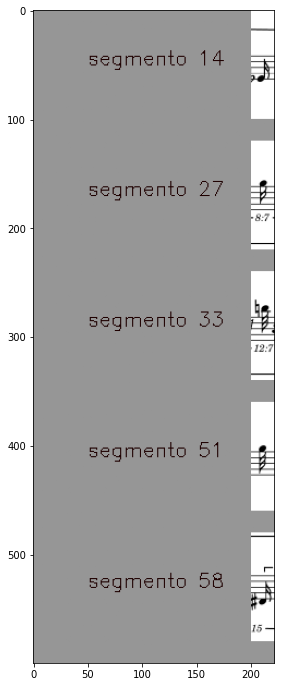

In [34]:
show_segments([14, 27, 33, 51, 58])
img = plt.imread('segment_lst.png')
plt.figure(figsize=(8,12))
plt.imshow(img)